# Multiscale Entropy

This notebooks runs multiscale entropy metrics on time series signals

This notebook includes:
- multiscale approximate entropy
- multiscale sample entropy
- multiscale permutation entropy
- multiscale weighted permutation entropy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.core.db import APMDB
from apm.run import run_sims_parallel as run_sims
from apm.methods import multi_sample_entropy, multi_app_entropy, multi_perm_entropy, multi_wperm_entropy
from apm.methods.settings import (MULTI_AP_ENT_PARAMS, MULTI_SA_ENT_PARAMS,
                                  MULTI_PE_ENT_PARAMS, MULTI_WPE_ENT_PARAMS)
from apm.plts.sims import plot_ap_sims, plot_pe_sims
from apm.sim.settings import SIM_PARAMS_AP, SIM_PARAMS_COMB, EXPS, FREQS, POWERS, N_SIMS, EXP
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

## Settings

In [3]:
# Custom settings
N_SIMS = 10

In [4]:
# Check settings for entropy measures
print('Multiscale Approximate Entropy:\t\t', MULTI_AP_ENT_PARAMS)
print('Multiscale Sample Entropy:\t\t', MULTI_SA_ENT_PARAMS)
print('Multiscale Permutation Entropy:\t\t', MULTI_PE_ENT_PARAMS)
print('Multiscale WPermutation Entropy:\t', MULTI_PE_ENT_PARAMS)

Multiscale Approximate Entropy:		 {}
Multiscale Sample Entropy:		 {}
Multiscale Permutation Entropy:		 {}
Multiscale WPermutation Entropy:	 {}


In [5]:
# Set the random seed
set_random_seed(111)

In [6]:
# Settings for saving figures
SAVE_FIG = True
EXT = '.pdf'
FIGPATH = APMDB().figs_path / '18_multiscale'

## Calculating Multiscale Entropy Measures on Example Signals

In [7]:
print('Computed multiscale approximate entropy:')
print('  powerlaw: \t {:1.4f}'.format(multi_app_entropy(SIG_AP, **MULTI_AP_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(multi_app_entropy(SIG_OSC, **MULTI_AP_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(multi_app_entropy(SIG_COMB, **MULTI_AP_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(multi_app_entropy(SIG_KN, **MULTI_AP_ENT_PARAMS)))

Computed multiscale approximate entropy:
  powerlaw: 	 0.1235
  osc:      	 0.0058
  combined: 	 0.3199
  knee:     	 0.4488


In [8]:
print('Computed multiscale sample entropy:')
print('  powerlaw: \t {:1.4f}'.format(multi_sample_entropy(SIG_AP, **MULTI_SA_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(multi_sample_entropy(SIG_OSC, **MULTI_SA_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(multi_sample_entropy(SIG_COMB, **MULTI_SA_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(multi_sample_entropy(SIG_KN, **MULTI_SA_ENT_PARAMS)))

Computed multiscale sample entropy:
  powerlaw: 	 1.3225
  osc:      	 0.0063
  combined: 	 0.5695
  knee:     	 0.5441


In [9]:
print('Computed multiscale permutation entropy:')
print('  powerlaw: \t {:1.4f}'.format(multi_perm_entropy(SIG_AP, **MULTI_PE_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(multi_perm_entropy(SIG_OSC, **MULTI_PE_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(multi_perm_entropy(SIG_COMB, **MULTI_PE_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(multi_perm_entropy(SIG_KN, **MULTI_PE_ENT_PARAMS)))

Computed multiscale permutation entropy:
  powerlaw: 	 0.8973
  osc:      	 0.8023
  combined: 	 0.9426
  knee:     	 0.9559


In [10]:
print('Computed multiscale weighted permutation entropy:')
print('  powerlaw: \t {:1.4f}'.format(multi_wperm_entropy(SIG_AP, **MULTI_WPE_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(multi_wperm_entropy(SIG_OSC, **MULTI_WPE_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(multi_wperm_entropy(SIG_COMB, **MULTI_WPE_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(multi_wperm_entropy(SIG_KN, **MULTI_WPE_ENT_PARAMS)))

Computed multiscale weighted permutation entropy:
  powerlaw: 	 0.8051


/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurokit2/complexity/entropy_permutation.py:180: RuntimeWarning: invalid value encountered in divide
  freq = freq / info["Weights"].sum()


  osc:      	 0.6931
  combined: 	 0.8983
  knee:     	 0.9263


## Multiscale Approximate Entropy


#### Aperiodic Variations

In [11]:
# Run simulations calculating multiscale approximate entropy across exponents
m_ap_sims_exp, m_ap_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, multi_app_entropy, MULTI_AP_ENT_PARAMS, 
    'update_exp', EXPS, N_SIMS, var_func=np.std)

In [12]:
# Run simulations calculating multiscale approximate entropy across exponents, with an oscillation
m_ap_sims_comb, m_ap_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_app_entropy, MULTI_AP_ENT_PARAMS, 
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


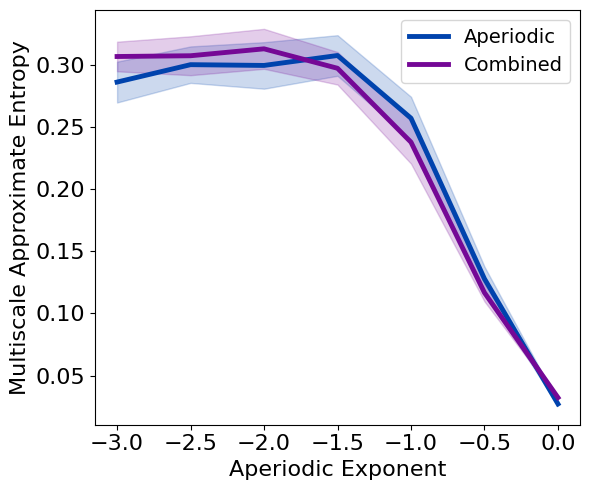

In [13]:
# Plot multiscale approximate entropy measures across aperiodic variations
plot_ap_sims(m_ap_sims_exp, m_ap_sims_exp_var, m_ap_sims_comb, m_ap_sims_exp_comb_var,
             'Multiscale Approximate Entropy', save_fig=SAVE_FIG, file_name='m_ap_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [14]:
# Run simulations calculating multiscale approximate entropy across oscillation frequency
m_ap_sims_freq, m_ap_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_app_entropy, MULTI_AP_ENT_PARAMS,
    'update_freq', FREQS, N_SIMS, var_func=np.std)

In [15]:
# Run simulations calculating multiscale approximate entropy across oscillation power
m_ap_sims_pow, m_ap_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_app_entropy, MULTI_AP_ENT_PARAMS,
    'update_pow', POWERS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


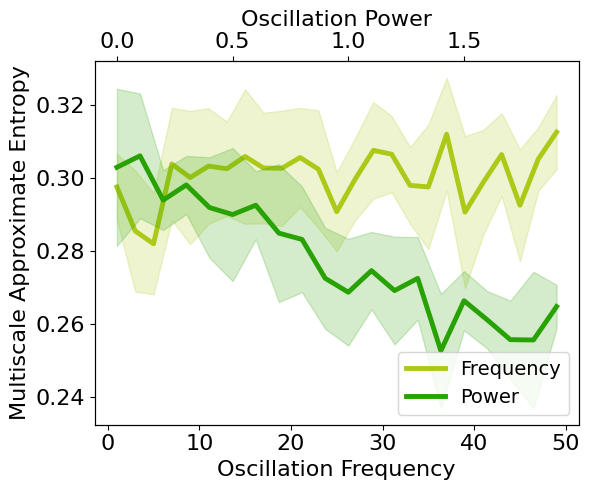

In [16]:
# Plot multiscale approximate entropy measures across aperiodic variations
plot_pe_sims(m_ap_sims_freq, m_ap_sims_freq_var, m_ap_sims_pow, m_ap_sims_pow_var,
             'Multiscale Approximate Entropy', save_fig=SAVE_FIG, file_name='m_ap_pe' + EXT, file_path=FIGPATH)

## Multiscale Sample Entropy

#### Aperiodic Variations

In [17]:
# Run simulations calculating multiscale sample entropy across exponents
m_sa_sims_exp, m_sa_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, multi_sample_entropy, MULTI_SA_ENT_PARAMS, 
    'update_exp', EXPS, N_SIMS, var_func=np.std)

In [18]:
# Run simulations calculating multiscale sample entropy across exponents, with an oscillation
m_sa_sims_comb, m_sa_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_sample_entropy, MULTI_SA_ENT_PARAMS, 
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


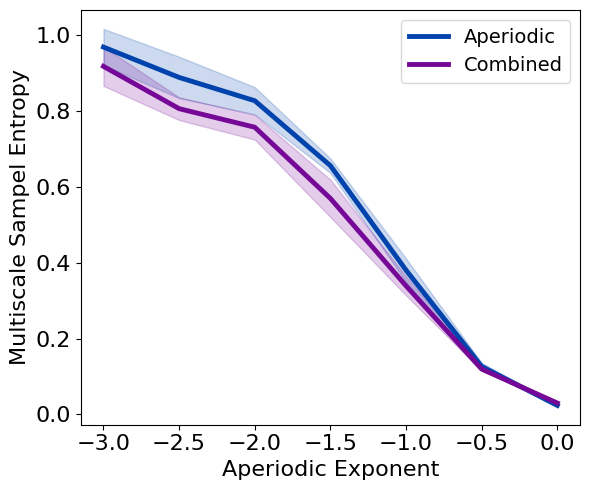

In [19]:
# Plot multiscale sample entropy measures across aperiodic variations
plot_ap_sims(m_sa_sims_exp, m_sa_sims_exp_var, m_sa_sims_comb, m_sa_sims_exp_comb_var,
             'Multiscale Sampel Entropy', save_fig=SAVE_FIG, file_name='m_sa_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [20]:
# Run simulations calculating multiscale sample entropy across oscillation frequency
m_sa_sims_freq, m_sa_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_sample_entropy, MULTI_SA_ENT_PARAMS,
    'update_freq', FREQS, N_SIMS, var_func=np.std)

In [21]:
# Run simulations calculating multiscale sample entropy across oscillation power
m_sa_sims_pow, m_sa_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_sample_entropy, MULTI_SA_ENT_PARAMS,
    'update_pow', POWERS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


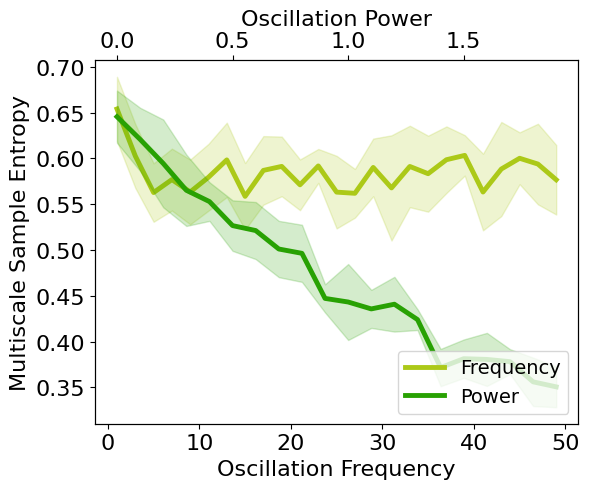

In [22]:
# Plot multiscale approximate sample measures across aperiodic variations
plot_pe_sims(m_sa_sims_freq, m_sa_sims_freq_var, m_sa_sims_pow, m_sa_sims_pow_var,
             'Multiscale Sample Entropy', save_fig=SAVE_FIG, file_name='m_sa_pe' + EXT, file_path=FIGPATH)

## Multiscale Permutation Entropy

#### Aperiodic Variations

In [23]:
# Run simulations calculating multiscale permutation entropy across exponents
m_pe_sims_exp, m_pe_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, multi_perm_entropy, MULTI_PE_ENT_PARAMS, 
    'update_exp', EXPS, N_SIMS, var_func=np.std)

In [24]:
# Run simulations calculating multiscale permutation entropy across exponents, with an oscillation
m_pe_sims_comb, m_pe_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_perm_entropy, MULTI_PE_ENT_PARAMS, 
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


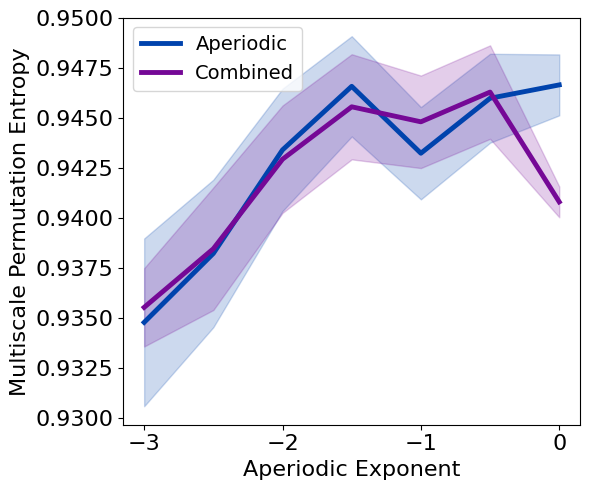

In [25]:
# Plot multiscale permutation entropy measures across aperiodic variations
plot_ap_sims(m_pe_sims_exp, m_pe_sims_exp_var, m_pe_sims_comb, m_pe_sims_exp_comb_var,
             'Multiscale Permutation Entropy', save_fig=SAVE_FIG, file_name='m_pe_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [26]:
# Run simulations calculating multiscale permutation entropy across oscillation frequency
m_pe_sims_freq, m_pe_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_perm_entropy, MULTI_PE_ENT_PARAMS,
    'update_freq', FREQS, N_SIMS, var_func=np.std)

In [27]:
# Run simulations calculating multiscale permutation entropy across oscillation power
m_pe_sims_pow, m_pe_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_perm_entropy, MULTI_PE_ENT_PARAMS,
    'update_pow', POWERS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


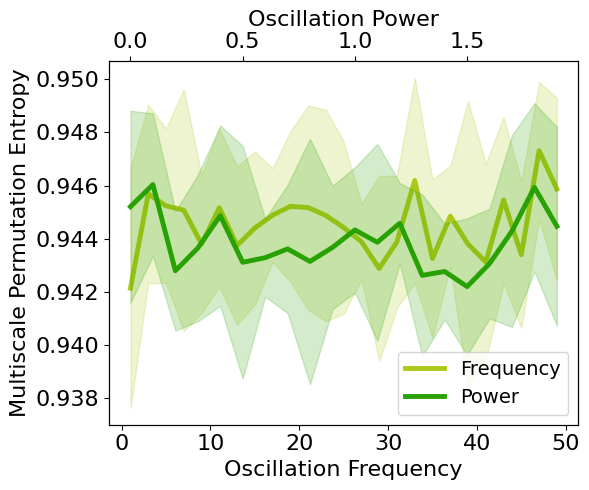

In [28]:
# Plot multiscale permutation entropy measures across aperiodic variations
plot_pe_sims(m_pe_sims_freq, m_pe_sims_freq_var, m_pe_sims_pow, m_pe_sims_pow_var,
             'Multiscale Permutation Entropy', save_fig=SAVE_FIG, file_name='m_pe_pe' + EXT, file_path=FIGPATH)

## Multiscale Weighted Permutation Entropy

#### Aperiodic Variations

In [29]:
# Run simulations calculating multiscale weighted permutation entropy across exponents
m_wpe_sims_exp, m_wpe_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, multi_wperm_entropy, MULTI_WPE_ENT_PARAMS, 
    'update_exp', EXPS, N_SIMS, var_func=np.std)

In [30]:
# Run simulations calculating multiscale weighted permutation entropy across exponents, with an oscillation
m_wpe_sims_comb, m_wpe_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_wperm_entropy, MULTI_WPE_ENT_PARAMS, 
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


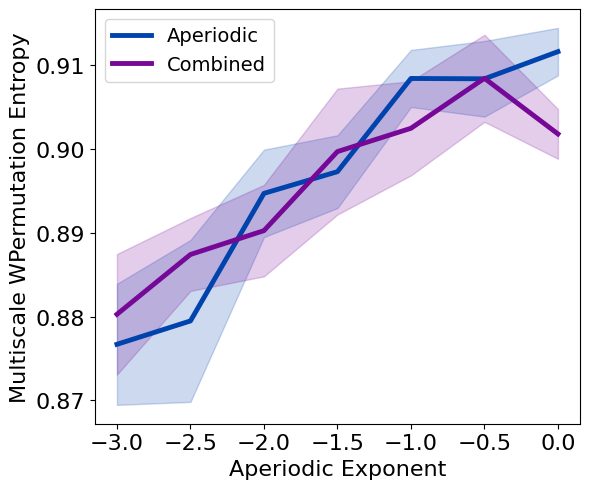

In [31]:
# Plot multiscale weighted permutation entropy measures across aperiodic variations
plot_ap_sims(m_wpe_sims_exp, m_wpe_sims_exp_var, m_wpe_sims_comb, m_wpe_sims_exp_comb_var,
             'Multiscale WPermutation Entropy', save_fig=SAVE_FIG, file_name='m_wpe_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [32]:
# Run simulations calculating multiscale weighted permutation entropy across oscillation frequency
m_wpe_sims_freq, m_wpe_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_wperm_entropy, MULTI_AP_ENT_PARAMS,
    'update_freq', FREQS, N_SIMS, var_func=np.std)

In [33]:
# Run simulations calculating multiscale weighted permutation entropy across oscillation power
m_wpe_sims_pow, m_wpe_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_wperm_entropy, MULTI_AP_ENT_PARAMS,
    'update_pow', POWERS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


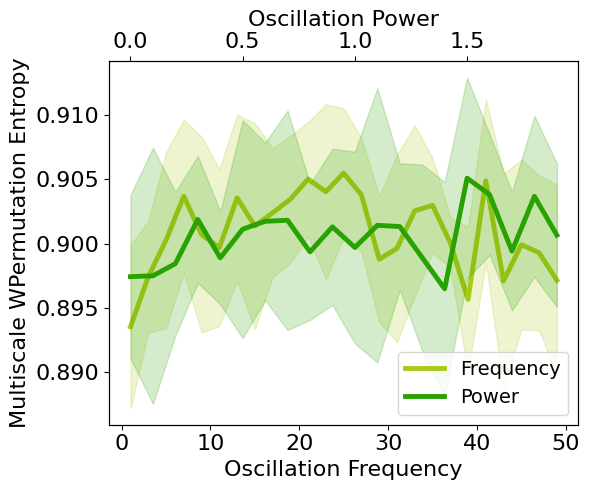

In [34]:
# Plot multiscale weighted permutation entropy measures across aperiodic variations
plot_pe_sims(m_wpe_sims_freq, m_wpe_sims_freq_var, m_wpe_sims_pow, m_wpe_sims_pow_var,
             'Multiscale WPermutation Entropy', save_fig=SAVE_FIG, file_name='m_wpe_pe' + EXT, file_path=FIGPATH)